In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from learn import Learner
import pretrainedmodels
from layers import Flatten, LSEPool2d
from dataloader import ChestXrayDataLoader
from dataset import ChestXray14Dataset
from recorder import LearningRecorder
import torch.nn as nn
from transform import chest_xray_transfrom
from metrics import aucs, auc
import torch
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from datetime import datetime
import torch.nn as nn

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# import pixiedust

In [3]:
PATH = Path('/mnt/data/xray-thesis/data/chestX-ray14')
IMAGES = 'images'
MODELS = 'models'

model_name = datetime.strftime(datetime.now(), '%Y%m%d-%H%M%S')
print(model_name)

20190122-114636


In [4]:
densenet = pretrainedmodels.__dict__['densenet121'](num_classes=1000, pretrained='imagenet')
backbone = list(densenet.children())[:-1]
model = nn.Sequential(
    *backbone,
    nn.AdaptiveAvgPool2d(1),
    Flatten(),
    nn.Linear(1024, 14)
)

model.cuda()
tfms = chest_xray_transfrom(densenet, size=128, scale_factor=0.875)

dataloader = ChestXrayDataLoader(tfms, batch_size=128, percentage=0.5)
recorder = LearningRecorder(PATH/MODELS, model_name)
criterion = nn.BCEWithLogitsLoss()
learn = Learner(model, dataloader, criterion, recorder, PATH/MODELS, model_name)

In [12]:
learn.find_lr()

 74%|███████▍  | 227/307 [12:12<04:58,  3.73s/it]

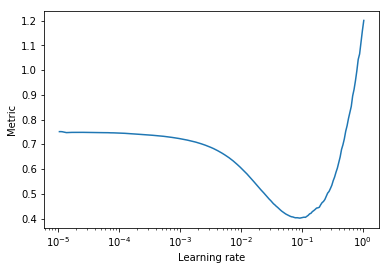

In [13]:
learn.sched.plot(0, 6)

In [4]:
lr = 1e-1
learn.fit(lr, 10, metrics=[auc])

Train:   0%|          | 0/307 [00:00<?, ?it/s]                      

epoch      trn_loss   val_loss   trn_auc    val_auc    
    0      0.469964   0.185749   0.509056   0.587957  


Train:   0%|          | 0/307 [00:00<?, ?it/s]                      

    1      0.181141   0.182534   0.569236   0.62309    ▼ ▼


Train:   0%|          | 0/307 [00:00<?, ?it/s]                      

    2      0.177833   0.180923   0.600479   0.62733    ▼ ▼


Train:   0%|          | 0/307 [00:00<?, ?it/s]                      

    3      0.17695    0.18259    0.610013   0.622341   ▼ △


Train:   0%|          | 0/307 [00:00<?, ?it/s]                      

    4      0.179569   0.184866   0.57895    0.608162   △ △


Train:   0%|          | 0/307 [00:00<?, ?it/s]                      

    5      0.181449   0.182822   0.571802   0.629771   △ ▼


Train:   0%|          | 0/307 [00:00<?, ?it/s]                      

    6      0.179786   0.187829   0.57811    0.613266   ▼ △


Train:   0%|          | 0/307 [00:00<?, ?it/s]                      

    7      0.178531   0.180359   0.588094   0.636832   ▼ ▼


Train:   0%|          | 0/307 [00:00<?, ?it/s]                      

    8      0.175999   0.178317   0.617173   0.656785   ▼ ▼


    9      0.174223   0.177687   0.640797   0.65173    ▼ ▼

